### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [1]:
%pip install missingno
%pip install requests

import pandas as pd
import missingno as msno
import requests
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2015 a 2021

In [2]:
df_accidents = pd.read_csv(
    "../databases/acidentes2015_2021.csv"
)
df_accidents.info()

/var/folders/z1/3syxl8gd5ks431s8c9n9mrs00000gn/T/ipykernel_26372/244838934.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235361 entries, 0 to 1235360
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id                      1235361 non-null  float64
 1   pesid                   1235356 non-null  float64
 2   data_inversa            1235361 non-null  object 
 3   dia_semana              1235361 non-null  object 
 4   horario                 1235361 non-null  object 
 5   uf                      1235361 non-null  object 
 6   br                      1233970 non-null  float64
 7   km                      1233970 non-null  object 
 8   municipio               1235361 non-null  object 
 9   causa_acidente          1235361 non-null  object 
 10  tipo_acidente           1235361 non-null  object 
 11  classificacao_acidente  1235359 non-null  object 
 12  fase_dia                1235360 non-null  object 
 13  sentido_via             1235361 non-null  object 
 14  co

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

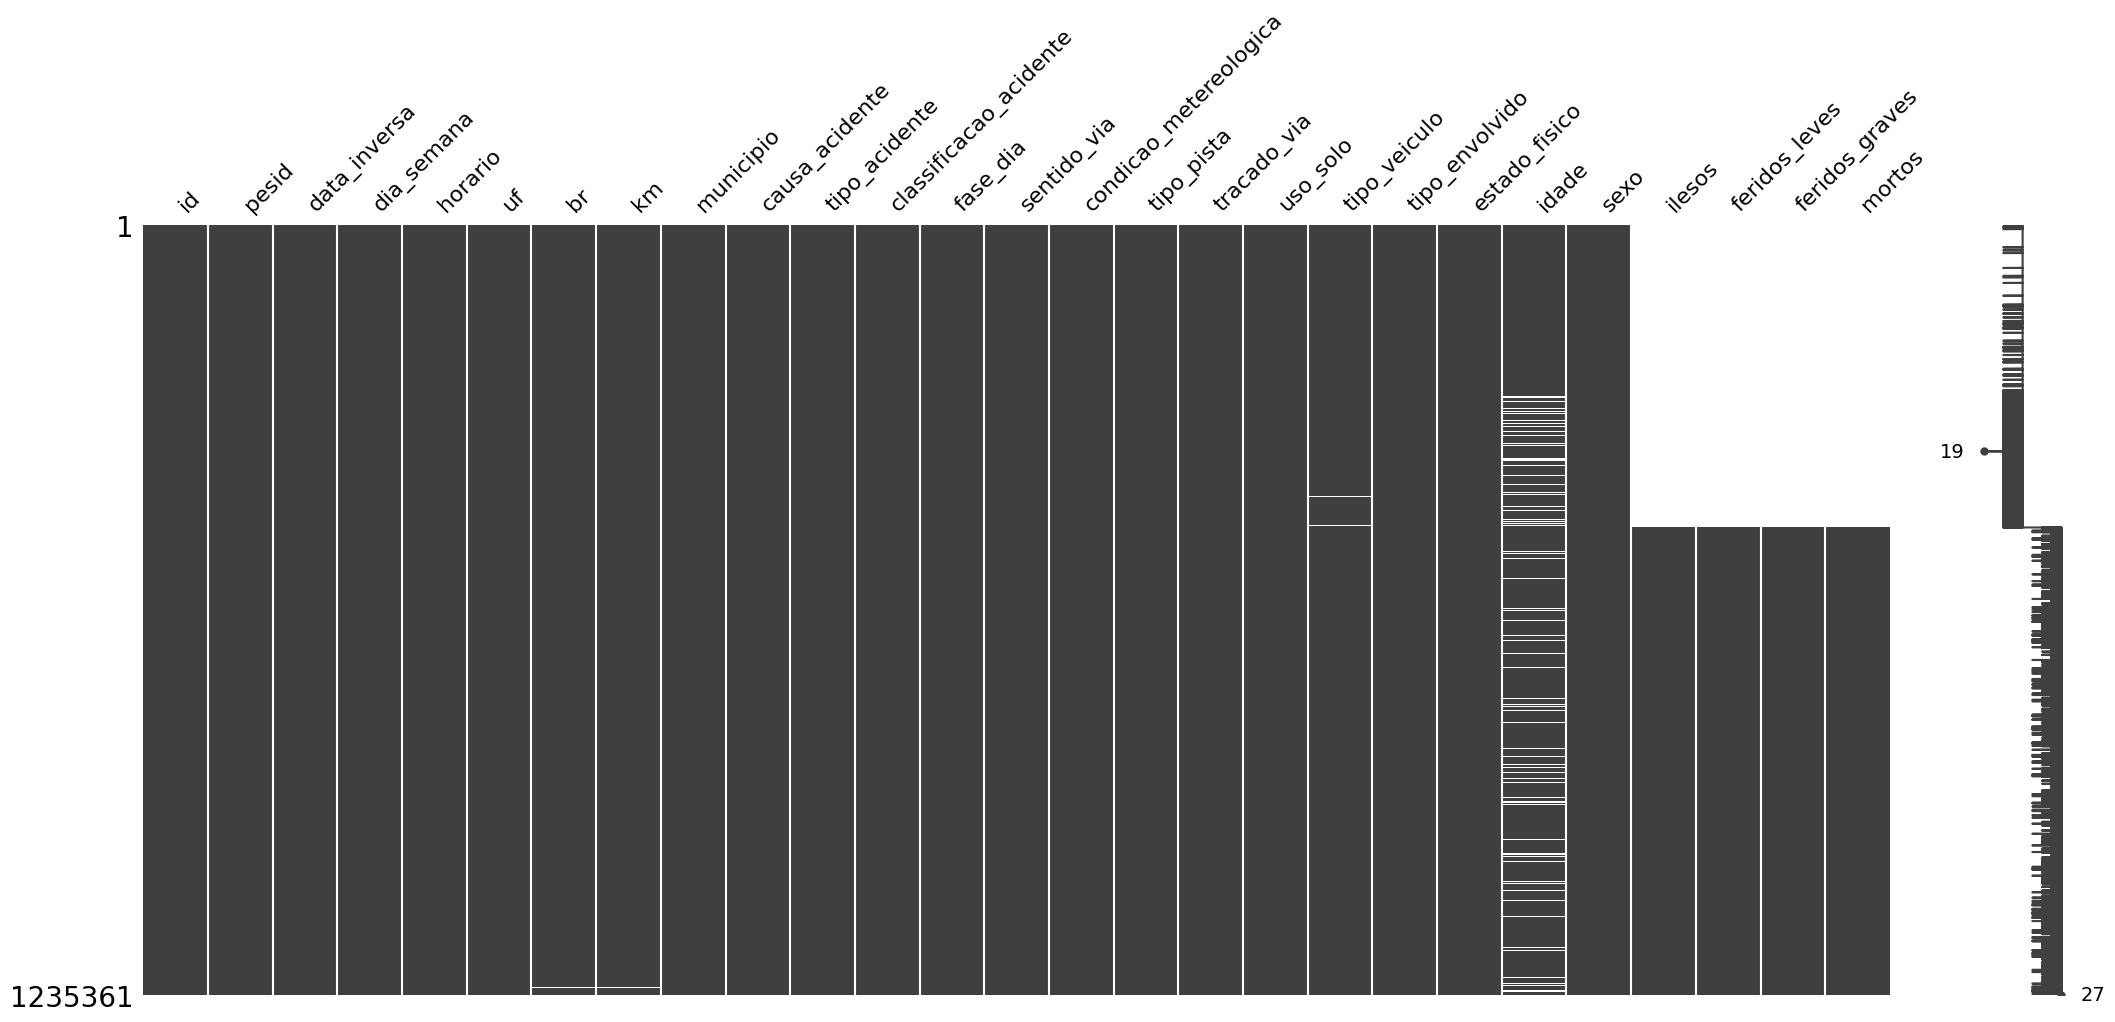

In [3]:
msno.matrix(df=df_accidents)

#### Verificando informações da coluna "br"

In [4]:
df_accidents["br"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: br
Non-Null Count    Dtype  
--------------    -----  
1233970 non-null  float64
dtypes: float64(1)
memory usage: 9.4 MB


#### Verificando dados estatísticos da coluna "br" antes do tratamento dos dados

In [5]:
df_accidents["br"].describe()

count    1.233970e+06
mean     2.145969e+02
std      1.299661e+02
min      0.000000e+00
25%      1.010000e+02
50%      1.630000e+02
75%      3.240000e+02
max      6.600000e+02
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" antes do tratamento

In [6]:
df_accidents["br"].isna().sum()

np.int64(1391)

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [7]:
br_column = pd.to_numeric(
    df_accidents["br"], errors="coerce").fillna(0).astype("int")
br_column = br_column.apply(
    lambda data: f'BR-{data}' if data != 0 else "Desconhecido")
df_accidents["br"] = br_column

#### Verificando dados faltantes categorizados como "Desconhecido" na coluna "br"

In [8]:
df_accidents[df_accidents["br"] == "Desconhecido"].shape

(1395, 27)

#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [9]:
df_accidents["br"].describe()

count     1235361
unique        138
top        BR-101
freq       196223
Name: br, dtype: object

#### Verificando informações da coluna "km"

In [10]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: km
Non-Null Count    Dtype 
--------------    ----- 
1233970 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


#### Verificando dados estatísticos da coluna "km" antes do tratamento dos dados

In [11]:
df_accidents["km"].describe()

count     1233970
unique      19831
top             1
freq         3829
Name: km, dtype: object

#### Verificando dados faltantes na coluna "km" antes do tratamento

In [12]:
df_accidents["km"].isna().sum()

np.int64(1391)

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "km"

In [13]:
km_column = pd.to_numeric(
    df_accidents["km"], errors="coerce").fillna(0).astype("int")
km_column = km_column.apply(
    lambda data: f'KM-{data}' if data != 0 else "Desconhecido")
df_accidents["km"] = km_column
df_accidents["km"].head()

0    KM-327
1    KM-327
2    KM-434
3    KM-434
4     KM-64
Name: km, dtype: object

#### Verificando dados faltantes categorizados como "Desconhecido" na coluna "km"

In [14]:
df_accidents[df_accidents["km"] == "Desconhecido"].shape

(485285, 27)

#### Verificando dados estatísticos da coluna "km" após o tratamento dos dados

In [15]:
df_accidents["km"].describe()

count          1235361
unique            1168
top       Desconhecido
freq            485285
Name: km, dtype: object

#### Verificando informações da coluna "data_inversa"

In [16]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: data_inversa
Non-Null Count    Dtype 
--------------    ----- 
1235361 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


#### Verificando dados estatísticos da coluna "data_inversa" antes do tratamento dos dados

In [17]:
df_accidents["data_inversa"].describe()

count        1235361
unique          2373
top       05/04/2015
freq            1536
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" antes do tratamento dos dados

In [18]:
df_accidents["data_inversa"].value_counts()

data_inversa
05/04/2015    1536
14/02/2015    1436
02/04/2015    1364
13/02/2015    1354
2017-12-23    1280
              ... 
2020-03-30     183
2018-05-29     173
2020-03-25     163
2020-03-23     154
2020-03-26     148
Name: count, Length: 2373, dtype: int64

#### Verificando dados faltantes na coluna "data_inversa" antes do tratamento

In [19]:
df_accidents["data_inversa"].isna().sum()

np.int64(0)

#### Padronizando o formato da data do campo data_inversa para dd/MM/yyyy

In [20]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format='mixed', dayfirst=True).dt.strftime('%d/%m/%Y').to_frame()
df_accidents["data_inversa"].value_counts()

data_inversa
05/04/2015    1536
14/02/2015    1436
02/04/2015    1364
13/02/2015    1354
23/12/2017    1280
              ... 
30/03/2020     183
29/05/2018     173
25/03/2020     163
23/03/2020     154
26/03/2020     148
Name: count, Length: 2373, dtype: int64

#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [21]:
df_accidents["data_inversa"].describe()

count        1235361
unique          2373
top       05/04/2015
freq            1536
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mês para facilitar análise futura

In [22]:
column_name = "mes"
months = {
    1: "Janeiro",
    2: "Fevereiro",
    3: "Março",
    4: "Abril",
    5: "Maio",
    6: "Junho",
    7: "Julho",
    8: "Agosto",
    9: "Setembro",
    10: "Outubro",
    11: "Novembro",
    12: "Dezembro",
}

formatted_month = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.month.map(months)
formatted_month

if column_name in df_accidents.columns:
    df_accidents[column_name] = formatted_month
else:
    df_accidents = df_accidents.assign(**{column_name: formatted_month})
df_accidents.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,mes
0,83298209.0,5085680.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Automóvel,Condutor,Ileso,31.0,Feminino,NaN,NaN,NaN,NaN,Janeiro
1,83298209.0,5085683.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Automóvel,Condutor,Ileso,54.0,Masculino,NaN,NaN,NaN,NaN,Janeiro
2,83298218.0,5085748.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Automóvel,Condutor,Ileso,45.0,Masculino,NaN,NaN,NaN,NaN,Janeiro
3,83298218.0,5085750.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Automóvel,Passageiro,Ferido Leve,52.0,Feminino,NaN,NaN,NaN,NaN,Janeiro
4,83298220.0,5090792.0,01/01/2015,Quinta,01:45:00,RJ,BR-40,KM-64,PETROPOLIS,Outras,...,Automóvel,Condutor,Ileso,33.0,Feminino,NaN,NaN,NaN,NaN,Janeiro


#### Verificando informações da coluna mes após sua inserção

In [23]:
df_accidents["mes"].value_counts()

mes
Janeiro      124018
Março        111120
Maio         109401
Dezembro     108934
Fevereiro    108681
Abril        107251
Junho        106435
Julho         94848
Outubro       93645
Agosto        91021
Setembro      90067
Novembro      89940
Name: count, dtype: int64

#### Criando coluna auxiliar ano para facilitar análise futura

In [24]:
column_name = "ano"
formatted_year = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.year

if column_name in df_accidents.columns:
    df_accidents[column_name] = formatted_year
else:
    df_accidents = df_accidents.assign(**{column_name: formatted_year})

df_accidents.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,mes,ano
0,83298209.0,5085680.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Condutor,Ileso,31.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015
1,83298209.0,5085683.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Condutor,Ileso,54.0,Masculino,NaN,NaN,NaN,NaN,Janeiro,2015
2,83298218.0,5085748.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Condutor,Ileso,45.0,Masculino,NaN,NaN,NaN,NaN,Janeiro,2015
3,83298218.0,5085750.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Passageiro,Ferido Leve,52.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015
4,83298220.0,5090792.0,01/01/2015,Quinta,01:45:00,RJ,BR-40,KM-64,PETROPOLIS,Outras,...,Condutor,Ileso,33.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015


#### Verificando informações da coluna ano após sua inserção

In [25]:
df_accidents["ano"].value_counts()

ano
2015    269052
2016    216261
2017    204395
2018    164802
2019    162273
2020    147642
2021     70936
Name: count, dtype: int64

#### Obtendo lista de feriados à partir de um determinado ano

In [26]:
from datetime import datetime

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
holidays = []

for year in years:
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        holidays.extend([{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%d/%m/%Y"),
            "name": data["name"]
        } for data in response.json()])
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")
print(holidays)

[{'date': '01/01/2015', 'name': 'Confraternização mundial'}, {'date': '17/02/2015', 'name': 'Carnaval'}, {'date': '03/04/2015', 'name': 'Sexta-feira Santa'}, {'date': '05/04/2015', 'name': 'Páscoa'}, {'date': '21/04/2015', 'name': 'Tiradentes'}, {'date': '01/05/2015', 'name': 'Dia do trabalho'}, {'date': '04/06/2015', 'name': 'Corpus Christi'}, {'date': '07/09/2015', 'name': 'Independência do Brasil'}, {'date': '12/10/2015', 'name': 'Nossa Senhora Aparecida'}, {'date': '02/11/2015', 'name': 'Finados'}, {'date': '15/11/2015', 'name': 'Proclamação da República'}, {'date': '25/12/2015', 'name': 'Natal'}, {'date': '01/01/2016', 'name': 'Confraternização mundial'}, {'date': '09/02/2016', 'name': 'Carnaval'}, {'date': '25/03/2016', 'name': 'Sexta-feira Santa'}, {'date': '27/03/2016', 'name': 'Páscoa'}, {'date': '21/04/2016', 'name': 'Tiradentes'}, {'date': '01/05/2016', 'name': 'Dia do trabalho'}, {'date': '26/05/2016', 'name': 'Corpus Christi'}, {'date': '07/09/2016', 'name': 'Independência

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil

In [27]:

holidays_dict = {holiday["date"]: holiday["name"] for holiday in holidays}

df_accidents["feriado"] = df_accidents["data_inversa"].map(
    holidays_dict).fillna("Dia útil")
df_accidents.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,mes,ano,feriado
0,83298209.0,5085680.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Ileso,31.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015,Confraternização mundial
1,83298209.0,5085683.0,01/01/2015,Quinta,00:05:00,RJ,BR-101,KM-327,NITEROI,Outras,...,Ileso,54.0,Masculino,NaN,NaN,NaN,NaN,Janeiro,2015,Confraternização mundial
2,83298218.0,5085748.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Ileso,45.0,Masculino,NaN,NaN,NaN,NaN,Janeiro,2015,Confraternização mundial
3,83298218.0,5085750.0,01/01/2015,Quinta,01:20:00,MS,BR-163,KM-434,CAMPO GRANDE,Animais na Pista,...,Ferido Leve,52.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015,Confraternização mundial
4,83298220.0,5090792.0,01/01/2015,Quinta,01:45:00,RJ,BR-40,KM-64,PETROPOLIS,Outras,...,Ileso,33.0,Feminino,NaN,NaN,NaN,NaN,Janeiro,2015,Confraternização mundial


#### Verificando informações da coluna "dia_semana"

In [28]:
df_accidents["dia_semana"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1235361 entries, 0 to 1235360
Series name: dia_semana
Non-Null Count    Dtype 
--------------    ----- 
1235361 non-null  object
dtypes: object(1)
memory usage: 9.4+ MB


#### Verificando dados estatísticos da coluna "dia_semana antes do tratamento dos dados

In [29]:
df_accidents["dia_semana"].describe()

count     1235361
unique         25
top       domingo
freq       128202
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" antes do tratamento dos dados

In [30]:
df_accidents["dia_semana"].value_counts()

dia_semana
domingo          128202
sábado           101792
sexta-feira       93630
segunda-feira     80967
Domingo           79380
quinta-feira      77032
quarta-feira      73547
terça-feira       72079
Segunda           66222
Sábado            42616
Sexta             42044
Sábado            36770
Quinta            36455
Quarta            34686
Sexta             34072
Terça             33309
Quinta            28003
Quarta            26388
Terça             25368
sÃ¡bado           24906
sexta             22901
segunda           19774
quinta            18896
quarta            18504
terÃ§a            17818
Name: count, dtype: int64

#### Tratamento da coluna "dia_semana" para corrigir codificação

In [31]:
days_of_week = {
    0: "Segunda-feira",
    1: "Terça-feira",
    2: "Quarta-feira",
    3: "Quinta-feira",
    4: "Sexta-feira",
    5: "Sábado",
    6: "Domingo"
}

df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%d/%m/%Y').dt.day_of_week.map(days_of_week)
df_accidents["dia_semana"].head()

0    Quinta-feira
1    Quinta-feira
2    Quinta-feira
3    Quinta-feira
4    Quinta-feira
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" após o tratamento dos dados

In [32]:
df_accidents["dia_semana"].value_counts()

dia_semana
Domingo          207582
Sábado           206084
Sexta-feira      192647
Segunda-feira    166963
Quinta-feira     160386
Quarta-feira     153125
Terça-feira      148574
Name: count, dtype: int64

In [58]:
df_causas = pd.DataFrame(df_accidents["causa_acidente"].unique(), columns=[
                         "causa_acidente"]).to_csv("causas_acidentes.csv", index=False)

#### Reordenando o dataframe antes de salvar

In [33]:
df_accidents = df_accidents[[
    "id",
    "pesid",
    "data_inversa",
    "ano", "mes",
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "municipio",
    "br",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tracado_via",
    "tipo_acidente",
    "causa_acidente",
    "tipo_veiculo",
    "classificacao_acidente",
    "estado_fisico",
    "tipo_envolvido",
    "sexo",
    "idade",
    "ilesos",
    "feridos_leves",
    "feridos_graves",
    "mortos"
]]
df_accidents.head()

,id,pesid,data_inversa,ano,mes,dia_semana,horario,fase_dia,condicao_metereologica,uf,...,tipo_veiculo,classificacao_acidente,estado_fisico,tipo_envolvido,sexo,idade,ilesos,feridos_leves,feridos_graves,mortos
0,83298209.0,5085680.0,01/01/2015,2015,Janeiro,Quinta-feira,00:05:00,Plena noite,Ceu Claro,RJ,...,Automóvel,Sem Vítimas,Ileso,Condutor,Feminino,31.0,NaN,NaN,NaN,NaN
1,83298209.0,5085683.0,01/01/2015,2015,Janeiro,Quinta-feira,00:05:00,Plena noite,Ceu Claro,RJ,...,Automóvel,Sem Vítimas,Ileso,Condutor,Masculino,54.0,NaN,NaN,NaN,NaN
2,83298218.0,5085748.0,01/01/2015,2015,Janeiro,Quinta-feira,01:20:00,Plena noite,Ceu Claro,MS,...,Automóvel,Com Vítimas Feridas,Ileso,Condutor,Masculino,45.0,NaN,NaN,NaN,NaN
3,83298218.0,5085750.0,01/01/2015,2015,Janeiro,Quinta-feira,01:20:00,Plena noite,Ceu Claro,MS,...,Automóvel,Com Vítimas Feridas,Ferido Leve,Passageiro,Feminino,52.0,NaN,NaN,NaN,NaN
4,83298220.0,5090792.0,01/01/2015,2015,Janeiro,Quinta-feira,01:45:00,Plena noite,Nublado,RJ,...,Automóvel,Sem Vítimas,Ileso,Condutor,Feminino,33.0,NaN,NaN,NaN,NaN


#### Salvando os dados em um novo CSV após o tratamento de dados

In [34]:
with open("../databases/acidentes2015_2021_tratado_v1.csv", "w") as f:
    df_accidents.to_csv(f, index=False)